In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
from math import radians, cos, sin, asin, sqrt
from sklearn import linear_model
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [6]:
#Reading data file 
data = pd.read_csv('d_final_afterJun2016.csv')
#data.rename(columns={'Unnamed: 0': 'newName1', 'oldName2': 'newName2'}, inplace=True)
#data = data.drop(data.columns[0], axis=1)
data.head()

,Date,Unnamed: 0,bike_id,distance,end_lat,end_lon,end_station,end_time,median,passholder_type,...,start_lat,start_lon,start_month,start_station,start_time,start_year,std_num,trip_duration_mins,trip_id,trip_route_category
0,2016-07-07 21:09:00,10752,6059,617,34.051102,-118.26456,3052,2016-07-07 21:14:00,10.0,Monthly Pass,...,34.048401,-118.26095,7,3035,2016-07-07 21:09:00,2016,25.0,5.0,1976946,One Way
1,2016-07-07 16:46:00,13506,6528,1600,34.049198,-118.25283,3063,2016-07-07 16:57:00,10.0,Monthly Pass,...,34.038609,-118.26086,7,3019,2016-07-07 16:46:00,2016,1.0,11.0,1955940,One Way
2,2016-07-07 22:36:00,37228,6137,636,34.048550,-118.25905,3005,2016-07-07 22:39:00,10.0,Monthly Pass,...,34.045422,-118.25352,7,3051,2016-07-07 22:36:00,2016,49.0,3.0,1981245,One Way
3,2016-07-07 12:51:00,44384,6717,1700,34.039219,-118.23649,3054,2016-07-07 13:04:00,10.0,Monthly Pass,...,34.045609,-118.23703,7,3021,2016-07-07 12:51:00,2016,9.0,13.0,1944075,One Way
4,2016-07-07 20:26:00,45207,6476,1935,34.039219,-118.23649,3054,2016-07-07 20:49:00,10.0,Monthly Pass,...,34.044701,-118.25244,7,3031,2016-07-07 20:26:00,2016,169.0,23.0,1972668,One Way


In [0]:
#Creating a new column Date from the column "start_time" of the dataframe 
data["Date"] = pd.to_datetime(data["start_time"])

In [0]:
#Creating a copy of data since loading data takes a lot of time
data1 = data.copy()

In [0]:
#Dropping null values
data1 = data1.dropna() 
# Converting float values to interger
data1["end_station"] = data1["end_station"].astype(int)  
data1 = data1.set_index("Date") #setting index to Date column
data1 = data1.sort_index() #Arranging dates 

In [10]:
data1.head()

,Unnamed: 0,bike_id,distance,end_lat,end_lon,end_station,end_time,median,passholder_type,plan_duration,...,start_lat,start_lon,start_month,start_station,start_time,start_year,std_num,trip_duration_mins,trip_id,trip_route_category
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-07 04:17:00,8635,6281,0,34.056610,-118.23721,3014,2016-07-07 04:20:00,35.0,Monthly Pass,30,...,34.056610,-118.23721,7,3014,2016-07-07 04:17:00,2016,1024.0,3.0,1912818,Round Trip
2016-07-07 06:00:00,8636,6281,0,34.056610,-118.23721,3014,2016-07-07 06:33:00,35.0,Monthly Pass,30,...,34.056610,-118.23721,7,3014,2016-07-07 06:00:00,2016,4.0,33.0,1919661,Round Trip
2016-07-07 10:32:00,8353,5861,0,34.052898,-118.24156,3016,2016-07-07 10:37:00,35.0,Annual Pass,365,...,34.052898,-118.24156,7,3016,2016-07-07 10:32:00,2016,900.0,5.0,1933383,Round Trip
2016-07-07 12:51:00,10077,6674,0,34.049889,-118.25588,3032,2016-07-07 12:58:00,35.0,Walk-up,0,...,34.049889,-118.25588,7,3032,2016-07-07 12:51:00,2016,784.0,7.0,1940317,Round Trip
2016-07-07 12:51:00,44384,6717,1700,34.039219,-118.23649,3054,2016-07-07 13:04:00,10.0,Monthly Pass,30,...,34.045609,-118.23703,7,3021,2016-07-07 12:51:00,2016,9.0,13.0,1944075,One Way


In [0]:
#length of end station is 142 and length of start station is 140
#start_stn = list(set(data1.start_station))
#end_stn = list(set(data1.end_station))
"""As length is not same of these two list, a search method is used to identify which element 
is missing from the start station, hence the next chunk of code is to find
the station number not in the start station list"""
#remove_stn = []
#for i in range(len(end_stn)):
#    if end_stn[i] not in start_stn:
#        remove_stn.append(end_stn[i])
#Updating end station list
#end_stn = [stn for stn in end_stn if stn not in remove_stn]

'As length is not same of these two list, a search method is used to identify which element \nis missing from the start station, hence the next chunk of code is to find\nthe station number not in the start station list'

In [0]:
#index_df =[]
#for i in range(len(data1.end_station)):
#  if data1.end_station[i] == remove_stn[0] or data1.end_station[i] == remove_stn[1]:
#    index_df.append(data1.index[i])
#  data = data1.drop(index_df)

In [0]:
#Removing rows with station number 4110,4143 and 4118 as it is discarded from the analysis
data1 = data1[data1['end_station']!=4110]
data1 = data1[data1['end_station']!=4118]
data1 = data1[data1['start_station']!=4143]

In [0]:
#Setting plan_duration = 0 for passholder_type = Walk-up
data1['plan_duration'].loc[data1['passholder_type'] == "Walk-up"] = 0

#Setting annual pass = flex as both of them are the same
data1['passholder_type'].loc[data1['passholder_type'] == "Annual Pass"] = "Flex Pass"

In [0]:
#Calculating trip duration in minutes
data1['start_time']= pd.to_datetime(data1['start_time']) 
data1['end_time']= pd.to_datetime(data1['end_time']) 
data1['trip_duration_mins'] = (data1.end_time - data1.start_time)/ timedelta(minutes=1)

In [0]:
#Creating a copy of data since it takes time to load data
data2 = data1.copy()

In [0]:
#Create dummy variables for passholder type
one_hot_pass = pd.get_dummies(data2['passholder_type']).rename(columns={
            'Flex Pass': 'annual',
            'Monthly Pass': 'monthly',
            'One Day Pass': 'one_day',
            'Walk-up':'walk_up'})

#Create dummy variables for trip route category
one_hot_trip_type = pd.get_dummies(data2['trip_route_category']).rename(columns={
            'Round Trip': 'round_trip',
            'One Way': 'one_way'})

In [0]:
#Calculating Distance traveled 
def calc_dist(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [0]:
vfunc = np.vectorize(calc_dist)
data2['Distance']= vfunc(data2.start_lon,data2.start_lat,data2.end_lon,data2.end_lat)

In [0]:
data2 = pd.concat([data2,one_hot_pass  ,one_hot_trip_type], axis=1)

In [17]:
data2.head()

,Unnamed: 0,bike_id,distance,end_lat,end_lon,end_station,end_time,median,passholder_type,plan_duration,...,std_num,trip_duration_mins,trip_id,trip_route_category,annual,monthly,one_day,walk_up,one_way,round_trip
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-07 04:17:00,8635,6281,0,34.056610,-118.23721,3014,2016-07-07 04:20:00,35.0,Monthly Pass,30,...,1024.0,3.0,1912818,Round Trip,0,1,0,0,0,1
2016-07-07 06:00:00,8636,6281,0,34.056610,-118.23721,3014,2016-07-07 06:33:00,35.0,Monthly Pass,30,...,4.0,33.0,1919661,Round Trip,0,1,0,0,0,1
2016-07-07 10:32:00,8353,5861,0,34.052898,-118.24156,3016,2016-07-07 10:37:00,35.0,Flex Pass,365,...,900.0,5.0,1933383,Round Trip,1,0,0,0,0,1
2016-07-07 12:51:00,10077,6674,0,34.049889,-118.25588,3032,2016-07-07 12:58:00,35.0,Walk-up,0,...,784.0,7.0,1940317,Round Trip,0,0,0,1,0,1
2016-07-07 12:51:00,44384,6717,1700,34.039219,-118.23649,3054,2016-07-07 13:04:00,10.0,Monthly Pass,30,...,9.0,13.0,1944075,One Way,0,1,0,0,1,0


In [0]:
month = 'month'
week = 'week'
day = 'day'
hour = 'hour'
def regression_data(data,col):
    '''
    Stacking dataset on the basis of start_station
    Args: data = dataframe
          col = column name/ time frame
    Returns: Stacked dataframe with index resetted
    '''
    df = data.copy()
    df["Year"]=df.start_time.dt.year
    if col.lower() == 'month':
        col = col.capitalize()
        df[col] = df.start_time.dt.month
    elif col.lower() == 'week':
        col = col.capitalize()
        df[col] = df.start_time.dt.week
    elif col.lower() == 'day':
        col = col.capitalize()
        df[col] = df.start_time.dt.day
    elif col.lower() == 'hour':
        col = col.capitalize()
        df[col] = df.start_time.dt.hour
    else:
        return print('Unable to extract time from index!!')
    df_sum = df.groupby(by=["start_station","Year",col]).sum()[['distance', 'trip_duration_mins']]
    df_sum1 = df.groupby(by=["start_station","Year",col]).mean()[['annual', 'monthly','one_day', 'walk_up', 'one_way', 'round_trip']]
    df_count = df.groupby(by=["start_station","Year",col]).count()[['trip_id']]
    df = pd.concat([df_sum,df_sum1 ,df_count], axis=1)
    df = df.reset_index()
    return df

In [0]:
df=data2.copy()
df1=df.loc[(df['annual'] == 1) & (df['one_way'] == 1)]
df1=regression_data(df1, month)
df2=df.loc[(df['monthly'] == 1) & (df['one_way'] == 1)]
df2=regression_data(df2, month)
df3=df.loc[(df['one_day'] == 1) & (df['one_way'] == 1)]
df3=regression_data(df3, month)
df4=df.loc[(df['walk_up'] == 1) & (df['one_way'] == 1)]
df4=regression_data(df4, month)
df5=df.loc[(df['annual'] == 1) & (df['round_trip'] == 1)]
df5=regression_data(df5, month)
df6=df.loc[(df['monthly'] == 1) & (df['round_trip'] == 1)]
df6=regression_data(df6, month)
df7=df.loc[(df['one_day'] == 1) & (df['round_trip'] == 1)]
df7=regression_data(df7, month)
df8=df.loc[(df['walk_up'] == 1) & (df['round_trip'] == 1)]
df8=regression_data(df8, month)

In [0]:
#data3 = grouping(data2,month)
df1.loc[df1['Year']==2017, 'Month'] = df1['Month']+12
df1.loc[df1['Year']==2018, 'Month'] = df1['Month']+24
df2.loc[df2['Year']==2017, 'Month'] = df2['Month']+12
df2.loc[df2['Year']==2018, 'Month'] = df2['Month']+24
df3.loc[df3['Year']==2017, 'Month'] = df3['Month']+12
df3.loc[df3['Year']==2018, 'Month'] = df3['Month']+24
df4.loc[df4['Year']==2017, 'Month'] = df4['Month']+12
df4.loc[df4['Year']==2018, 'Month'] = df4['Month']+24
df5.loc[df5['Year']==2017, 'Month'] = df5['Month']+12
df5.loc[df5['Year']==2018, 'Month'] = df5['Month']+24
df6.loc[df6['Year']==2017, 'Month'] = df6['Month']+12
df6.loc[df6['Year']==2018, 'Month'] = df6['Month']+24
df7.loc[df7['Year']==2017, 'Month'] = df7['Month']+12
df7.loc[df7['Year']==2018, 'Month'] = df7['Month']+24
df8.loc[df8['Year']==2017, 'Month'] = df8['Month']+12
df8.loc[df8['Year']==2018, 'Month'] = df8['Month']+24


In [0]:
frames = [df1, df2,df3, df4 , df5, df6, df7,df8]
data3 = pd.concat(frames)
data3.rename(columns={'trip_id': 'number_of_transactions'}, inplace=True)

In [51]:
data3.head()

,start_station,Year,Month,distance,trip_duration_mins,annual,monthly,one_day,walk_up,one_way,round_trip,number_of_transactions
0,3005,2016,7,56155,418.0,1,0,0,0,1,0,43
1,3005,2016,8,37725,281.0,1,0,0,0,1,0,25
2,3005,2016,9,56047,407.0,1,0,0,0,1,0,38
3,3005,2016,10,8801,69.0,1,0,0,0,1,0,6
4,3005,2016,11,6937,39.0,1,0,0,0,1,0,4


In [0]:
#Setting offset for continuity in months
#data3.loc[data3['Year']==2017, 'Month'] = data3['Month']+12
#data3.loc[data3['Year']==2018, 'Month'] = data3['Month']+24

In [0]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)      
      reg = linear_model.LinearRegression()
      est2 = reg.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared

In [34]:
len(r_squared)

123

In [0]:
result.sort_values(by=['R2'])

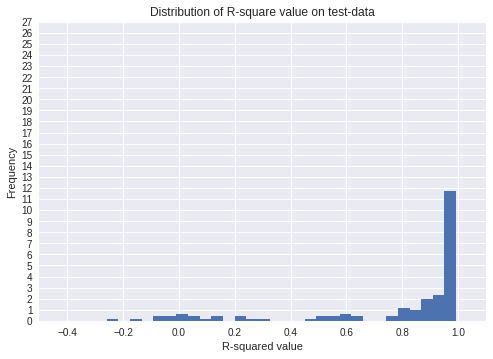

In [39]:
plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

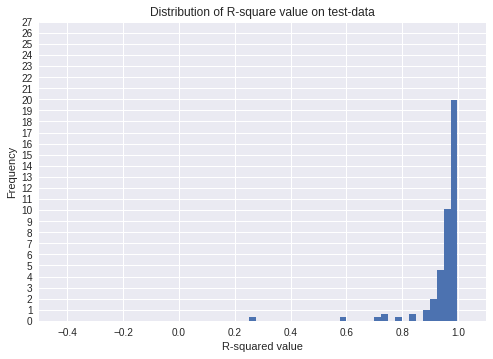

In [41]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance','trip_duration_mins']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)      
      reg = linear_model.LinearRegression()
      est2 = reg.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared


plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

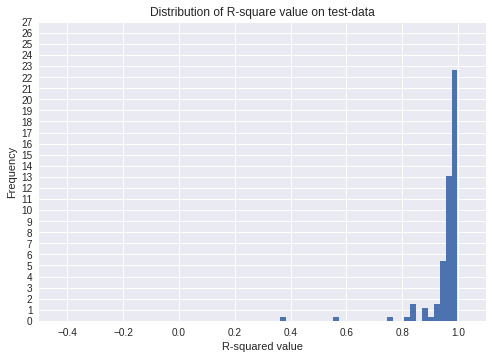

In [42]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance','trip_duration_mins','annual','monthly','one_day','walk_up',]]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)      
      reg = linear_model.LinearRegression()
      est2 = reg.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared


plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

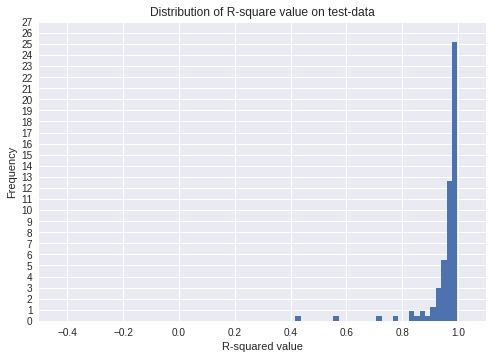

In [43]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance','trip_duration_mins','annual','monthly','one_day','walk_up','one_way','round_trip']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)      
      reg = linear_model.LinearRegression()
      est2 = reg.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared


plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

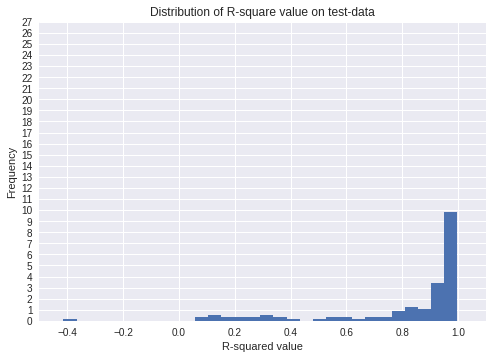

In [46]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
      rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
      est2=rf.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared



plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

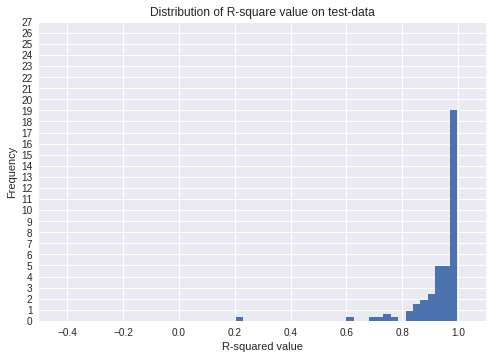

In [47]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance','trip_duration_mins']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
      rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
      est2=rf.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared



plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

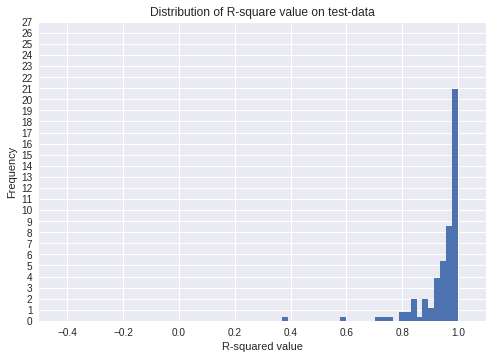

In [48]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance','trip_duration_mins','annual','monthly','one_day','walk_up']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
      rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
      est2=rf.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared



plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

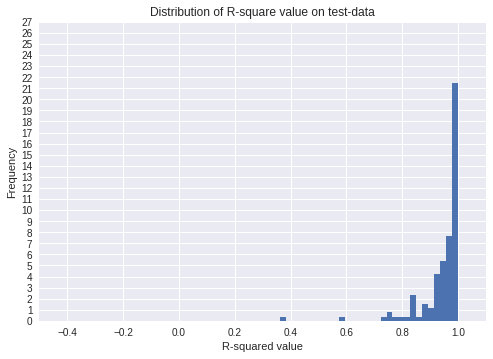

In [49]:
station = list(set(data3.start_station))
r_squared = []
station_num=[]
#Looping over all the stations to fit linear regressions individually
for i in range(len(station)):
    stn = station[i]
    if len(data3.loc[data3['start_station']==stn])>48:
      station_num += [stn]
      df = data3.loc[data3['start_station']==stn]
      x = df[['distance', 'trip_duration_mins','annual','monthly','one_day','walk_up','one_way','round_trip']]
      y = df["trip_id"]
      X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
      rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
      est2=rf.fit(X_train,y_train)
      ypred = est2.predict(X_test) #predicting y values on test dataset
      score = r2_score(y_test,ypred) #Calculating r-squared value on the test data
      r_squared.append(score)
result=pd.DataFrame()
result['Station_number']=station_num
result['R2']=r_squared



plt.hist(r_squared, normed=True, bins=30)
plt.xlabel("R-squared value")
plt.ylabel("Frequency")
plt.yticks(range(0,28))
#plt.xticks(range(0,1.1))
plt.xlim([-0.5,1.1])
plt.title('Distribution of R-square value on test-data')
plt.show()

In [0]:
result.sort_values(by=['R2'])

In [0]:
data3.loc[data3['start_station']==3013]

In [52]:
count=0
for i in range(len(r_squared)):
  if r_squared[i]<0.5:
    #if R2[i]==1:
      count = count + 1
print(count)

1
